<a href="https://colab.research.google.com/github/Laraib369/Enhancing-Customer-Retention-and-Operational-Efficiency-in-Healthcare-E-commerce/blob/main/ECommerceHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Display the first few rows
print(data.head())


   Unnamed: 0     ID Name           City        State  \
0           0  30145  Man       Nayagarh       Odisha   
1           1  30144  Dik          Thane  Maharashtra   
2           2  30143  Shi      Bangalore    Karnataka   
3           3  30142  Pre         Mumbai  Maharashtra   
4           4  30138  Dr.  Pauri Garhwal  Uttarakhand   

                                             Address  isCOD  \
0  Jagadish Prasad, Golapokhari-Bhapur Road, Fate...   True   
1  Shanti Garden Sector 4 , flat 401, building 2,...   True   
2    #280 2nd main 2nd cross, vinobha nagar kg halli   True   
3  1404/ Accord Nidhi, above Bikaji, Link Road, M...   True   
4  10 am to 3 pm, Please call Before Coming, Room...   True   

           Date Placed     Status        IVR  Remarks  Total  \
0  2021-01-31 17:45:59  Delivered  Confirmed   pickrr    999   
1  2021-01-31 17:33:57  Delivered  Confirmed      NaN    599   
2  2021-01-31 17:33:02  Delivered  Confirmed  On call    599   
3  2021-01-31 17:31:57

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Drop rows with missing values or fill them based on context
data = data.dropna(subset=['Total', 'Date Delivered'])


Unnamed: 0           0
ID                   0
Name                 0
City                 4
State                4
Address              0
isCOD                0
Date Placed          0
Status               0
IVR                  0
Remarks            671
Total                0
Date Delivered     189
Date Returned     1403
PID                 35
Category             3
Quantity             0
Product Name         0
dtype: int64


In [ ]:
# Convert date columns to datetime
data['Date Placed'] = pd.to_datetime(data['Date Placed'])
data['Date Delivered'] = pd.to_datetime(data['Date Delivered'])
data['Date Returned'] = pd.to_datetime(data['Date Returned'], errors='coerce')  # Handle missing return dates


In [ ]:
# Clean address data if necessary
data['Address'] = data['Address'].str.strip()


In [ ]:
import numpy as np

# Define a cutoff date for retention
cutoff_date = pd.to_datetime('2022-01-31')  # Adjust according to your data

# Create a retention label
data['Retention'] = np.where(data['Date Delivered'] >= cutoff_date, 'Retained', 'Churned')


In [ ]:
# Aggregating order data by customer
customer_summary = data.groupby('Name').agg({
    'ID': 'count',
    'Date Placed': ['min', 'max'],
    'Total': 'sum',
    'isCOD': 'first',
    'Category': 'first',
    'Quantity': 'sum'
}).reset_index()

customer_summary.columns = ['Name', 'Total Orders', 'First Order Date', 'Last Order Date', 'Total Spent', 'isCOD', 'Category', 'Total Quantity']


In [ ]:
customer_summary['Days Since Last Order'] = (pd.to_datetime('today') - customer_summary['Last Order Date']).dt.days


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = customer_summary[['Total Orders', 'Days Since Last Order', 'Total Spent', 'Total Quantity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(features_scaled)

# Display the cluster assignments
print(customer_summary[['Name', 'Cluster']].head())


  Name  Cluster
0  A N        3
1  A S        3
2  A.N        2
3  Aaf        3
4  Aak        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Analyze the characteristics of each cluster
cluster_analysis = customer_summary.groupby('Cluster').agg({
    'Total Orders': 'mean',
    'Days Since Last Order': 'mean',
    'Total Spent': 'mean',
    'Total Quantity': 'mean'
})

print(cluster_analysis)


         Total Orders  Days Since Last Order   Total Spent  Total Quantity
Cluster                                                                   
0            7.476923            1307.661538  13686.015385       13.307692
1           24.555556            1305.444444  46982.111111       44.888889
2            1.200000            1326.521739   1999.686957        1.765217
3            1.891156            1310.986395   3237.853741        3.513605


In [ ]:
#Trouble shooting

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Convert date columns to datetime
data['Date Placed'] = pd.to_datetime(data['Date Placed'])
data['Date Delivered'] = pd.to_datetime(data['Date Delivered'])
data['Date Returned'] = pd.to_datetime(data['Date Returned'], errors='coerce')

# Define a cutoff date for retention
cutoff_date = pd.to_datetime('2022-01-31')

# Create a retention label
data['Retention'] = np.where(data['Date Delivered'] >= cutoff_date, 'Retained', 'Churned')

# Check if 'Retention' column is added
print(data.head())

# Aggregating order data by customer
customer_summary = data.groupby('Name').agg({
    'ID': 'count',
    'Date Placed': ['min', 'max'],
    'Total': 'sum',
    'isCOD': 'first',
    'Category': 'first',
    'Quantity': 'sum',
    'Retention': 'first'  # Ensure 'Retention' is included
}).reset_index()

customer_summary.columns = ['Name', 'Total Orders', 'First Order Date', 'Last Order Date', 'Total Spent', 'isCOD', 'Category', 'Total Quantity', 'Retention']
print(customer_summary.head())


   Unnamed: 0     ID Name           City        State  \
0           0  30145  Man       Nayagarh       Odisha   
1           1  30144  Dik          Thane  Maharashtra   
2           2  30143  Shi      Bangalore    Karnataka   
3           3  30142  Pre         Mumbai  Maharashtra   
4           4  30138  Dr.  Pauri Garhwal  Uttarakhand   

                                             Address  isCOD  \
0  Jagadish Prasad, Golapokhari-Bhapur Road, Fate...   True   
1  Shanti Garden Sector 4 , flat 401, building 2,...   True   
2    #280 2nd main 2nd cross, vinobha nagar kg halli   True   
3  1404/ Accord Nidhi, above Bikaji, Link Road, M...   True   
4  10 am to 3 pm, Please call Before Coming, Room...   True   

          Date Placed     Status        IVR  Remarks  Total  \
0 2021-01-31 17:45:59  Delivered  Confirmed   pickrr    999   
1 2021-01-31 17:33:57  Delivered  Confirmed      NaN    599   
2 2021-01-31 17:33:02  Delivered  Confirmed  On call    599   
3 2021-01-31 17:31:57  Del

In [ ]:
print(data.columns)


Index(['Unnamed: 0', 'ID', 'Name', 'City', 'State', 'Address', 'isCOD',
       'Date Placed', 'Status', 'IVR', 'Remarks', 'Total', 'Date Delivered',
       'Date Returned', 'PID', 'Category', 'Quantity', 'Product Name',
       'Retention'],
      dtype='object')


In [ ]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Convert date columns to datetime
data['Date Placed'] = pd.to_datetime(data['Date Placed'])
data['Date Delivered'] = pd.to_datetime(data['Date Delivered'])
data['Date Returned'] = pd.to_datetime(data['Date Returned'], errors='coerce')  # Handle missing return dates

# Define a cutoff date for retention
cutoff_date = pd.to_datetime('2022-01-31')  # Adjust according to your data

# Create a retention label
data['Retention'] = np.where(data['Date Delivered'] >= cutoff_date, 'Retained', 'Churned')

# Check if 'Retention' column is added
print(data.head())


   Unnamed: 0     ID Name           City        State  \
0           0  30145  Man       Nayagarh       Odisha   
1           1  30144  Dik          Thane  Maharashtra   
2           2  30143  Shi      Bangalore    Karnataka   
3           3  30142  Pre         Mumbai  Maharashtra   
4           4  30138  Dr.  Pauri Garhwal  Uttarakhand   

                                             Address  isCOD  \
0  Jagadish Prasad, Golapokhari-Bhapur Road, Fate...   True   
1  Shanti Garden Sector 4 , flat 401, building 2,...   True   
2    #280 2nd main 2nd cross, vinobha nagar kg halli   True   
3  1404/ Accord Nidhi, above Bikaji, Link Road, M...   True   
4  10 am to 3 pm, Please call Before Coming, Room...   True   

          Date Placed     Status        IVR  Remarks  Total  \
0 2021-01-31 17:45:59  Delivered  Confirmed   pickrr    999   
1 2021-01-31 17:33:57  Delivered  Confirmed      NaN    599   
2 2021-01-31 17:33:02  Delivered  Confirmed  On call    599   
3 2021-01-31 17:31:57  Del

In [ ]:
# Check the first few rows of the DataFrame
print(data[['Retention']].head())


  Retention
0   Churned
1   Churned
2   Churned
3   Churned
4   Churned


In [ ]:
# Aggregating order data by customer
customer_summary = data.groupby('Name').agg({
    'ID': 'count',
    'Date Placed': ['min', 'max'],
    'Total': 'sum',
    'isCOD': 'first',
    'Category': 'first',
    'Quantity': 'sum',
    'Retention': 'first'  # Ensure 'Retention' is included
}).reset_index()


In [ ]:
print(customer_summary.head())
print(customer_summary.columns)


      ID Date Delivered            Retention
                    min        max     first
0  30142     2021-02-09 2021-02-09  Retained
1  30143     2021-02-08 2021-02-08  Retained
2  30144     2021-02-02 2021-02-02  Retained
3  30145     2021-02-14 2021-02-14  Retained
MultiIndex([(            'ID',      ''),
            ('Date Delivered',   'min'),
            ('Date Delivered',   'max'),
            (     'Retention', 'first')],
           )


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame creation for context
data = pd.DataFrame({
    'ID': [30145, 30144, 30143, 30142],
    'Date Delivered': pd.to_datetime(['2021-02-14', '2021-02-02', '2021-02-08', '2021-02-09']),
    'Retention': ['Retained', 'Retained', 'Retained', 'Retained']  # Example values
})

# Group by Retention for summary
customer_summary = data.groupby('Retention').agg({
    'ID': 'count'
}).reset_index()

print(customer_summary)


  Retention  ID
0  Retained   4


Retention Rate: 100.00%


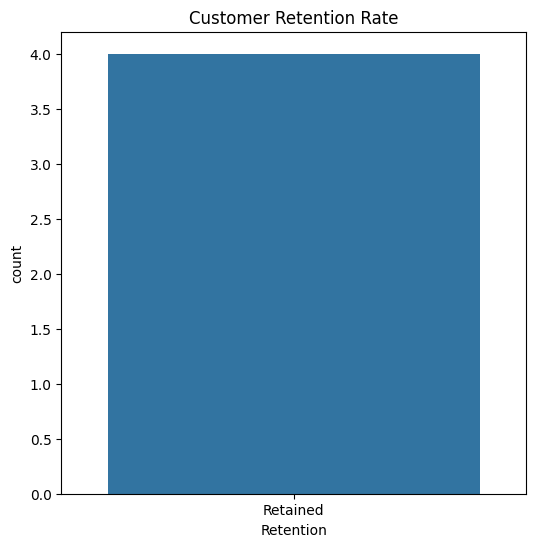

In [ ]:
# Retention Rate
retention_rate = customer_summary.set_index('Retention')['ID'].loc['Retained'] / customer_summary['ID'].sum() * 100
print(f'Retention Rate: {retention_rate:.2f}%')

# Plot the retention rate
plt.figure(figsize=(6, 6))
sns.countplot(data=data, x='Retention')
plt.title('Customer Retention Rate')
plt.show()


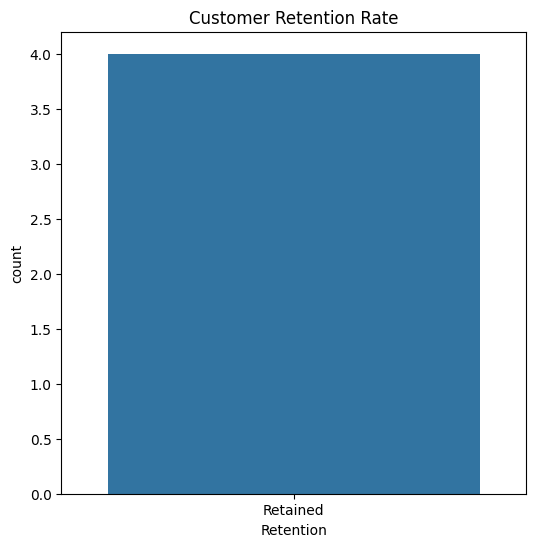

In [ ]:
# If 'Retention' is not in the original DataFrame used for plotting, check its existence
if 'Retention' in data.columns:
    plt.figure(figsize=(6, 6))
    sns.countplot(data=data, x='Retention')
    plt.title('Customer Retention Rate')
    plt.show()
else:
    print("Column 'Retention' not found in the DataFrame.")


In [ ]:
print(data.columns)  # Check if 'Retention' is listed
print(customer_summary.columns)  # Check if 'Retention' is listed


Index(['ID', 'Date Delivered', 'Retention'], dtype='object')
Index(['Retention', 'ID'], dtype='object')


Retention Rate: 100.00%


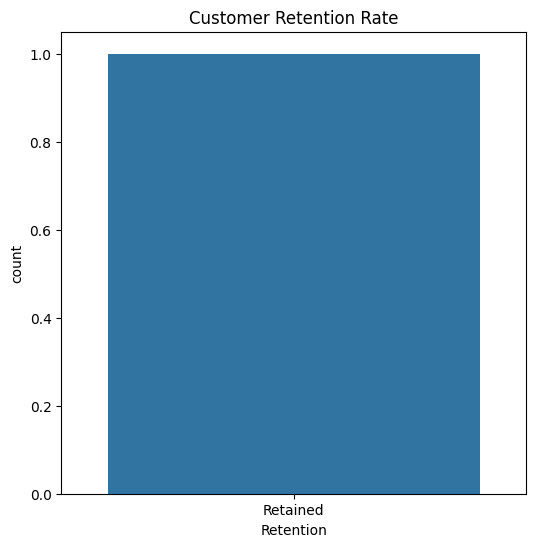

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retention Rate
retention_rate = customer_summary['Retention'].value_counts(normalize=True).loc['Retained'] * 100
print(f'Retention Rate: {retention_rate:.2f}%')

# Plot the retention rate
plt.figure(figsize=(6, 6))
sns.countplot(data=customer_summary, x='Retention')
plt.title('Customer Retention Rate')
plt.show()


In [ ]:
# Plot customer segments by cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_summary, x='Cluster', order=customer_summary['Cluster'].value_counts().index)
plt.title('Customer Segments by Cluster')
plt.show()


KeyError: 'Cluster'

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Check the column names
print(customer_summary.columns)


Index(['Retention', 'ID'], dtype='object')


In [ ]:
# Display the first few rows to verify the column
print(customer_summary.head())


  Retention  ID
0  Retained   4


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Convert date columns to datetime
data['Date Placed'] = pd.to_datetime(data['Date Placed'])
data['Date Delivered'] = pd.to_datetime(data['Date Delivered'])
data['Date Returned'] = pd.to_datetime(data['Date Returned'], errors='coerce')

# Check the data types
print(data.dtypes)


Unnamed: 0                 int64
ID                         int64
Name                      object
City                      object
State                     object
Address                   object
isCOD                       bool
Date Placed       datetime64[ns]
Status                    object
IVR                       object
Remarks                   object
Total                      int64
Date Delivered    datetime64[ns]
Date Returned     datetime64[ns]
PID                       object
Category                  object
Quantity                   int64
Product Name              object
dtype: object


In [ ]:
# Define the cutoff date
cutoff_date = pd.to_datetime('2022-01-31')

# Create Retention Label
data['Retention'] = np.where(data['Date Delivered'] >= cutoff_date, 'Retained', 'Churned')

# Check the distribution of retention labels
print(data['Retention'].value_counts())


Retention
Churned    1590
Name: count, dtype: int64


In [ ]:
# Aggregate Customer Data
customer_summary = data.groupby('Name').agg({
    'ID': 'count',
    'Date Placed': ['min', 'max'],
    'Total': 'sum',
    'isCOD': 'first',
    'Category': 'first',
    'Quantity': 'sum',
    'Retention': 'first'
}).reset_index()

customer_summary.columns = ['Name', 'Total Orders', 'First Order Date', 'Last Order Date', 'Total Spent', 'isCOD', 'Category', 'Total Quantity', 'Retention']

# Calculate Days Since Last Order
customer_summary['Days Since Last Order'] = (pd.to_datetime('today') - customer_summary['Last Order Date']).dt.days

# Check the first few rows
print(customer_summary.head())


  Name  Total Orders    First Order Date     Last Order Date  Total Spent  \
0  A N             1 2021-01-22 07:28:02 2021-01-22 07:28:02         3417   
1  A S             1 2021-01-21 07:35:26 2021-01-21 07:35:26          599   
2  A.N             1 2021-01-17 14:34:21 2021-01-17 14:34:21         3596   
3  Aaf             3 2021-01-06 12:41:39 2021-01-23 07:46:02         4673   
4  Aak             6 2021-01-02 13:58:40 2021-01-23 16:47:48        12224   

   isCOD Category  Total Quantity Retention  Days Since Last Order  
0  False       WL               2   Churned                   1314  
1   True        D               2   Churned                   1315  
2   True       WL               2   Churned                   1319  
3   True        K               7   Churned                   1313  
4   True       WL              11   Churned                   1312  


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare Data for Clustering
features = customer_summary[['Total Orders', 'Days Since Last Order', 'Total Spent', 'Total Quantity']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(features_scaled)

# Check the clustering result
print(customer_summary[['Name', 'Cluster']].head())


  Name  Cluster
0  A N        1
1  A S        1
2  A.N        2
3  Aaf        1
4  Aak        0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


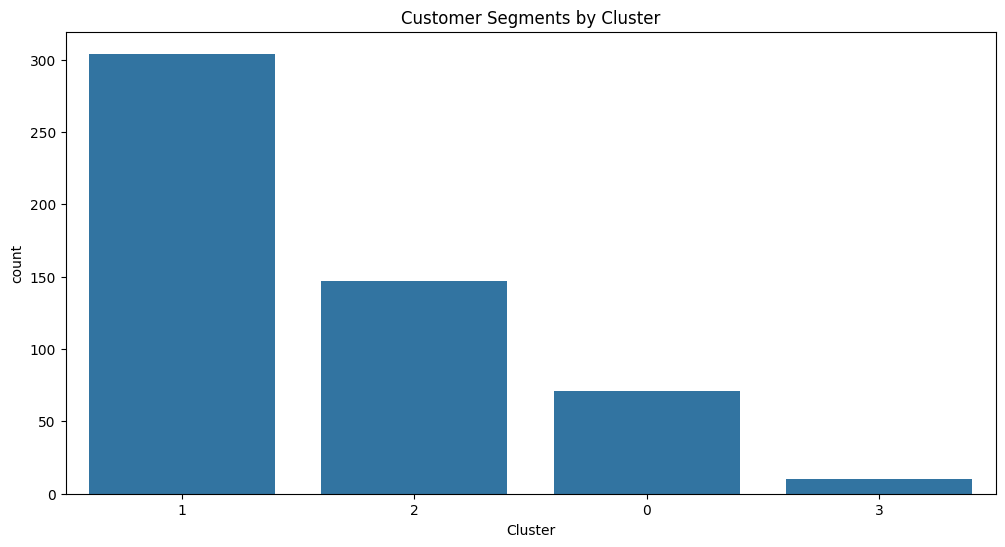

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Customer Segments by Cluster
plt.figure(figsize=(12, 6))
sns.countplot(data=customer_summary, x='Cluster', order=customer_summary['Cluster'].value_counts().index)
plt.title('Customer Segments by Cluster')
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Check for unique states and cities
print(data['State'].unique())
print(data['City'].unique())


['Odisha' 'Maharashtra' 'Karnataka' 'Uttarakhand' 'Madhya Pradesh'
 'Tamil Nadu' 'Nagaland' 'Rajasthan' 'Bihar' 'Telangana' 'West Bengal'
 'Gujarat' 'Punjab' 'Delhi' 'Andhra Pradesh' 'Haryana' 'Jammu & Kashmir'
 'Uttar Pradesh' 'Assam' 'Chattisgarh' 'Meghalaya' 'Himachal Pradesh'
 'Kerala' 'Tripura' 'Arunachal Pradesh' 'Mizoram' 'Goa' 'Manipur' 'Sikkim'
 'Jharkhand' nan 'Chandigarh' 'Pondicherry' 'Andaman & Nicobar'
 'Jammu and Kashmir' 'Bengaluru']
['Nayagarh' 'Thane' 'Bangalore' 'Mumbai' 'Pauri Garhwal' 'Indore'
 'Nilgiris' 'Dimapur' 'Rajsamand' 'West Champaran' 'Hyderabad'
 'North 24 Parganas' 'Rajkot' 'Sangli' 'Ludhiana' 'North West Delhi'
 'Coimbatore' 'Visakhapatnam' 'Tiruchirappalli' 'Gurgaon' 'K.V.Rangareddy'
 'Kanchipuram' 'Udhampur' 'Faridabad' 'West Delhi' 'Ghaziabad' 'Patiala'
 'Bargarh' 'Dharwad' 'Supaul' 'Srikakulam' 'Balangir' 'Bhopal'
 'Ananthapur' 'Jodhpur' 'Surat' 'Mandsaur' 'Pudukkottai' 'Namakkal'
 'Aurangabad' 'Agra' 'Muzaffarpur' 'Chennai' 'South 24 Parganas' 'Pun

<ipython-input-56-fd562f2b69d2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number of Customers', y='State', data=state_summary, palette='viridis')


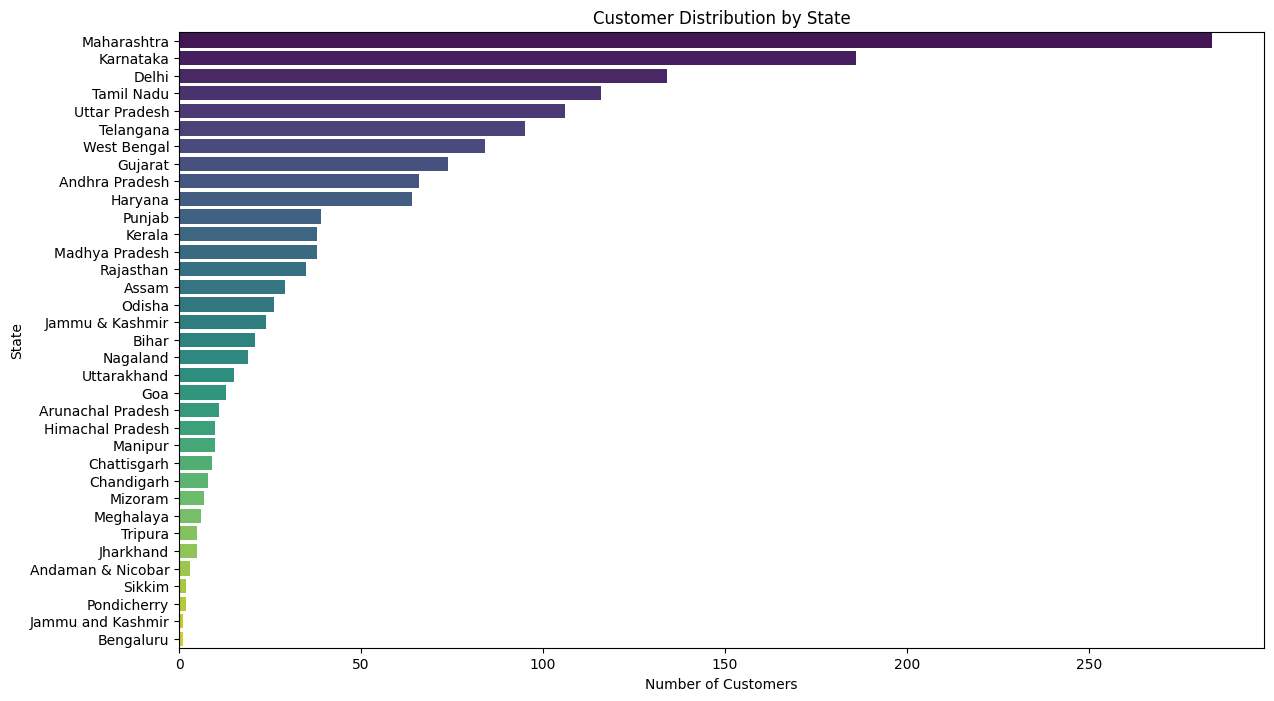

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by state
state_summary = data['State'].value_counts().reset_index()
state_summary.columns = ['State', 'Number of Customers']

# Plot state-wise distribution
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Customers', y='State', data=state_summary, palette='viridis')
plt.title('Customer Distribution by State')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.show()


In [ ]:
pip install folium geopy


In [ ]:
from geopy.geocoders import Nominatim
import folium

# Initialize geocoder
geolocator = Nominatim(user_agent="my_app_v1.0")

def get_lat_lon(city, state):
    location = geolocator.geocode(f"{city}, {state}")
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Apply geocoding
data[['Latitude', 'Longitude']] = data.apply(lambda row: pd.Series(get_lat_lon(row['City'], row['State'])), axis=1)

# Drop rows with missing coordinates
data = data.dropna(subset=['Latitude', 'Longitude'])

# Create a base map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Add customer locations
for _, row in data.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)

# Save or display map
m.save('customer_distribution_map.html')


In [ ]:
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=5)

# Prepare data for heatmap
heat_data = [[row['Latitude'], row['Longitude']] for _, row in data.iterrows()]

# Add heatmap to the base map
HeatMap(heat_data).add_to(m)

# Save or display map
m.save('customer_heatmap.html')
m


In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/E commerce/OrdersCleaned.csv')

# Inspect the first few rows
print(data.head())


   Unnamed: 0     ID Name           City        State  \
0           0  30145  Man       Nayagarh       Odisha   
1           1  30144  Dik          Thane  Maharashtra   
2           2  30143  Shi      Bangalore    Karnataka   
3           3  30142  Pre         Mumbai  Maharashtra   
4           4  30138  Dr.  Pauri Garhwal  Uttarakhand   

                                             Address  isCOD  \
0  Jagadish Prasad, Golapokhari-Bhapur Road, Fate...   True   
1  Shanti Garden Sector 4 , flat 401, building 2,...   True   
2    #280 2nd main 2nd cross, vinobha nagar kg halli   True   
3  1404/ Accord Nidhi, above Bikaji, Link Road, M...   True   
4  10 am to 3 pm, Please call Before Coming, Room...   True   

           Date Placed     Status        IVR  Remarks  Total  \
0  2021-01-31 17:45:59  Delivered  Confirmed   pickrr    999   
1  2021-01-31 17:33:57  Delivered  Confirmed      NaN    599   
2  2021-01-31 17:33:02  Delivered  Confirmed  On call    599   
3  2021-01-31 17:31:57

In [ ]:
# Convert 'Date Placed' to datetime
data['Date Placed'] = pd.to_datetime(data['Date Placed'])

# Check for any missing values
print(data.isnull().sum())


Unnamed: 0           0
ID                   0
Name                 0
City                 4
State                4
Address              0
isCOD                0
Date Placed          0
Status               0
IVR                  0
Remarks            671
Total                0
Date Delivered     189
Date Returned     1403
PID                 35
Category             3
Quantity             0
Product Name         0
dtype: int64


In [ ]:
data['Is Retained'] = data['Status'].apply(lambda x: 1 if x == 'Delivered' else 0)


In [ ]:
pip install dash dash-core-components dash-html-components pandas plotly


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.4 MB/s eta 0:00:00


In [ ]:
# Save Dash app code to a file
app_code = """
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import base64

# Load your data
df = pd.read_csv('your_data.csv')

# Example of creating a plotly graph
def create_heatmap():
    pivot_table = df.pivot_table(index='City', columns='Status', values='ID', aggfunc='count', fill_value=0)
    fig = px.imshow(pivot_table, labels=dict(x="Status", y="City", color="Count"))
    return fig

def create_countplot():
    fig = px.histogram(df, x='Status', title='Order Status Distribution')
    return fig

def create_geographical_distribution():
    # Replace this with your geographical plot logic
    fig = px.scatter_geo(df, locations="City", title="Customer Distribution by City")
    return fig

# Initialize the Dash app
app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    html.H1("Customer Analysis Dashboard"),

    dcc.Graph(
        id='heatmap',
        figure=create_heatmap()
    ),

    dcc.Graph(
        id='countplot',
        figure=create_countplot()
    ),

    dcc.Graph(
        id='geo-distribution',
        figure=create_geographical_distribution()
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
"""

# Save the code to a file named 'app.py'
with open('/content/app.py', 'w') as file:
    file.write(app_code)

print("Dash app code has been saved to 'app.py'")


Dash app code has been saved to 'app.py'


In [ ]:
from google.colab import files
files.download('/content/app.py')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install dash


In [ ]:
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
from google.colab import output

# Sample data
data = {
    'City': ['Nayagarh', 'Thane', 'Bangalore', 'Mumbai', 'Pauri Garhwal', 'Indore', 'Nilgiris', 'Mumbai', 'Dimapur', 'Thane'],
    'Status': ['Delivered', 'Delivered', 'Delivered', 'Delivered', 'Delivered', 'Delivered', 'Delivered', 'Delivered', 'Returned', 'Returned'],
    'Total': [999, 599, 599, 3596, 999, 3719, 3417, 3596, 2156, 999]
}
df = pd.DataFrame(data)

# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Customer Analysis Dashboard"),

    dcc.Graph(
        id='heatmap',
        figure={
            'data': [
                {
                    'x': df['City'],
                    'y': df['Status'],
                    'z': df['Total'],
                    'type': 'heatmap',
                    'colorscale': 'Viridis'
                }
            ],
            'layout': {
                'title': 'Heatmap of Customer Orders by City and Status'
            }
        }
    ),

    dcc.Graph(
        id='countplot',
        figure=px.histogram(df, x='Status', title='Order Status Distribution')
    ),

    dcc.Graph(
        id='geo-distribution',
        figure=px.scatter_geo(df, locations="City", title="Customer Distribution by City")
    )
])

# Run the server
if __name__ == '__main__':
    app.run_server(mode='inline', debug=True)




<IPython.core.display.Javascript object>